In [1]:
import numpy  as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [3]:
df = pd.read_csv("data/open_pubs.csv", header=None)
df.columns = ["fsa_id", "name", "address", "postcode",
              "easting", "northing", "latitude", "longitude",
              "local_authority"]
df

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh
...,...,...,...,...,...,...,...,...,...
51326,597119,Wrexham & District War Memorial Club Ltd,"Wrexham War Memorial Club Farndon Street, Wrex...",LL13 8DE,333909,350438,53.047100,-2.987319,Wrexham
51327,597127,Wrexham Lager Social Club,"1 - 3 Union Road, Wrexham, Wrexham",LL13 7SR,333028,350563,53.048123,-3.000485,Wrexham
51328,597130,Wrexham Rail Sports & Social Club,"Sports And Social Club, 44 Brook Street, Wrexh...",LL13 7LU,333259,350213,53.044998,-2.996966,Wrexham
51329,597131,Wrexham Rugby Club,"Wrexham Rugby Club Bryn Estyn Road, Wrexham, W...",LL13 9TY,335808,351078,53.053094,-2.959124,Wrexham


In [4]:
df.isna().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [5]:
for i in range(len(df["latitude"])):
    if df["latitude"][i] == "\\N" or df["longitude"][i] == "\\N":
        df["latitude"][i] = np.NaN
        df["longitude"][i] = np.NaN
    else:
        pass
    
import warnings
warnings.filterwarnings(action="ignore")

/var/folders/bm/bmkbm_491vxdrv91crd35txr0000gn/T/ipykernel_48848/2374871942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["latitude"][i] = np.NaN
/var/folders/bm/bmkbm_491vxdrv91crd35txr0000gn/T/ipykernel_48848/2374871942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["longitude"][i] = np.NaN


In [6]:
df.isna().sum()

fsa_id               0
name                 0
address              0
postcode             0
easting              0
northing             0
latitude           767
longitude          767
local_authority      0
dtype: int64

### Since just 767 null values, we can drop them

In [7]:
df.dropna(inplace=True)

In [8]:
df[["latitude", "longitude"]] = df[["latitude", "longitude"]].astype("float")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50564 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fsa_id           50564 non-null  int64  
 1   name             50564 non-null  object 
 2   address          50564 non-null  object 
 3   postcode         50564 non-null  object 
 4   easting          50564 non-null  int64  
 5   northing         50564 non-null  int64  
 6   latitude         50564 non-null  float64
 7   longitude        50564 non-null  float64
 8   local_authority  50564 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.9+ MB


### Exporting

In [10]:
df.to_csv("data/clean_open_pubs.csv", index_label=False)

In [11]:
df

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
5,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
6,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
...,...,...,...,...,...,...,...,...,...
51326,597119,Wrexham & District War Memorial Club Ltd,"Wrexham War Memorial Club Farndon Street, Wrex...",LL13 8DE,333909,350438,53.047100,-2.987319,Wrexham
51327,597127,Wrexham Lager Social Club,"1 - 3 Union Road, Wrexham, Wrexham",LL13 7SR,333028,350563,53.048123,-3.000485,Wrexham
51328,597130,Wrexham Rail Sports & Social Club,"Sports And Social Club, 44 Brook Street, Wrexh...",LL13 7LU,333259,350213,53.044998,-2.996966,Wrexham
51329,597131,Wrexham Rugby Club,"Wrexham Rugby Club Bryn Estyn Road, Wrexham, W...",LL13 9TY,335808,351078,53.053094,-2.959124,Wrexham


In [12]:
local_authority_counts = df["local_authority"].value_counts()
local_authority_counts_dict = dict(local_authority_counts)
local_authority_counts_dict

{'County Durham': 680,
 'Leeds': 611,
 'Cornwall': 557,
 'Wiltshire': 544,
 'Kirklees': 524,
 'City of Edinburgh': 506,
 'Birmingham': 494,
 'Buckinghamshire': 485,
 'Bradford': 478,
 'Northumberland': 446,
 'East Riding of Yorkshire': 432,
 'Shropshire': 415,
 'Bristol, City of': 408,
 'Dorset': 405,
 'Fife': 404,
 'Liverpool': 370,
 'Manchester': 356,
 'Glasgow City': 356,
 'Westminster': 353,
 'Brighton and Hove': 348,
 'Sheffield': 345,
 'Calderdale': 340,
 'Wakefield': 326,
 'Rhondda Cynon Taf': 306,
 'West Northamptonshire': 305,
 'Doncaster': 298,
 'East Lindsey': 293,
 'Dudley': 293,
 'North Northamptonshire': 293,
 'Powys': 284,
 'Newcastle upon Tyne': 283,
 'Cheshire East': 279,
 'Barnsley': 279,
 'Carmarthenshire': 262,
 'Camden': 261,
 'Nottingham': 252,
 'South Lanarkshire': 247,
 'Stoke-on-Trent': 244,
 'Tameside': 240,
 'Oldham': 239,
 'Herefordshire, County of': 229,
 'East Suffolk': 222,
 'North Lanarkshire': 221,
 'Sunderland': 221,
 'York': 219,
 'Cardiff': 219,
 'Sa

In [13]:
import itertools

In [14]:
new_loc_authority_dict = dict(itertools.islice(local_authority_counts_dict.items(), 0,10))
new_loc_authority_dict

{'County Durham': 680,
 'Leeds': 611,
 'Cornwall': 557,
 'Wiltshire': 544,
 'Kirklees': 524,
 'City of Edinburgh': 506,
 'Birmingham': 494,
 'Buckinghamshire': 485,
 'Bradford': 478,
 'Northumberland': 446}

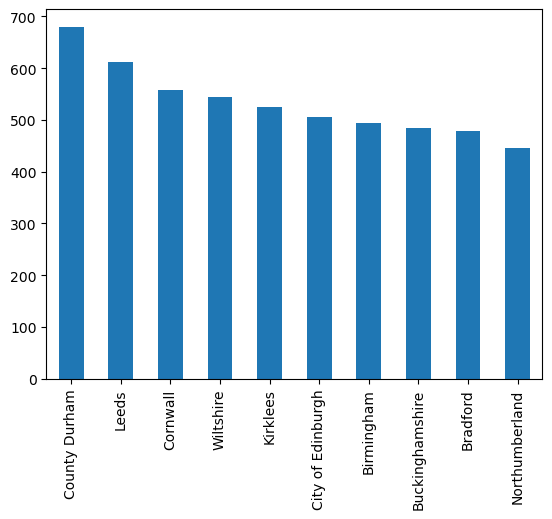

In [15]:
loc_authority_series = pd.Series(new_loc_authority_dict).plot.bar()
plt.show()

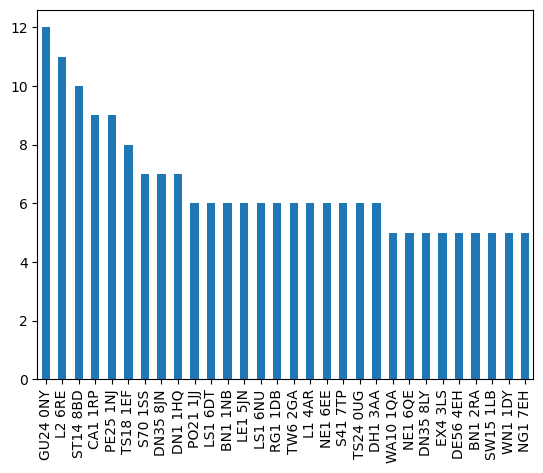

In [16]:
postcode_counts = df["postcode"].value_counts()
postcode_counts_dict = dict(postcode_counts)
new_postcode_dict = dict(itertools.islice(postcode_counts_dict.items(), 0,30))
postcode_series = pd.Series(new_postcode_dict).plot.bar()
plt.show()

## Finding the Euclidean Distance

In [17]:
import math

# Approximate radius of the Earth in kilometers
R = 6371

def euclidean_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the Euclidean distance between two points on the Earth's surface
    given their latitudes and longitudes using the formula:
    distance = R * sqrt((lat2-lat1)^2 + (cos((lat1+lat2)/2) * (lon2-lon1))^2)
    where R is the radius of the Earth (approx. 6371 km).
    """
    
    # Trigonometric functions like sine and cosine in Python's math library expect their arguments
    # to be in radians, not degrees.
    # Therefore, we need to convert the degree values to radians before we can use these
    # trigonometric functions in our formula.
    
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    lat_diff = lat2 - lat1
    lon_diff = lon2 - lon1
    
    # atan2 allows you to specify both the numerator and denominator of 
    # the fraction whose arctangent we want to calculate
    a = math.sin(lat_diff / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(lon_diff / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    return distance # units are kilometers.

In [18]:
df.loc[5,"latitude"]

52.028694

In [19]:
df.loc[5,"longitude"]

0.89565

In [20]:
euclidean_distance(df.loc[5,"latitude"], df.loc[5,"longitude"], 52.03, 0.64)

17.49051614396702

In [21]:
df1 = pd.read_csv("data/clean_open_pubs.csv")
df1

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
5,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
6,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
...,...,...,...,...,...,...,...,...,...
51326,597119,Wrexham & District War Memorial Club Ltd,"Wrexham War Memorial Club Farndon Street, Wrex...",LL13 8DE,333909,350438,53.047100,-2.987319,Wrexham
51327,597127,Wrexham Lager Social Club,"1 - 3 Union Road, Wrexham, Wrexham",LL13 7SR,333028,350563,53.048123,-3.000485,Wrexham
51328,597130,Wrexham Rail Sports & Social Club,"Sports And Social Club, 44 Brook Street, Wrexh...",LL13 7LU,333259,350213,53.044998,-2.996966,Wrexham
51329,597131,Wrexham Rugby Club,"Wrexham Rugby Club Bryn Estyn Road, Wrexham, W...",LL13 9TY,335808,351078,53.053094,-2.959124,Wrexham
